In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Data Collection
wine = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine.shape

(1599, 12)

In [ ]:
# first 5 rows of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Data Analysis

In [ ]:
# Statistical Measure of the Dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


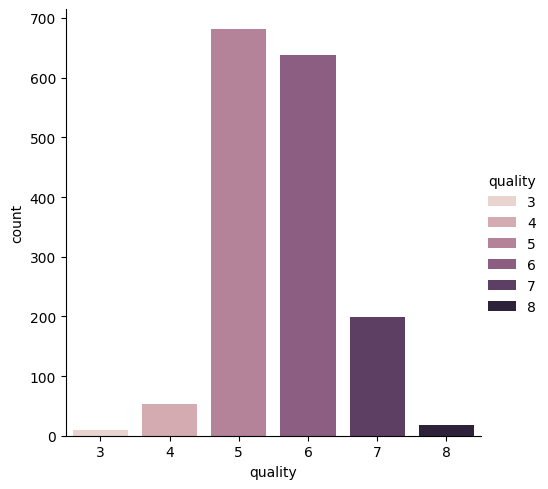

In [ ]:
# number of values for each quality
sns.catplot(x = 'quality', data = wine, kind = 'count', hue = 'quality')

<Axes: xlabel='quality', ylabel='volatile acidity'>

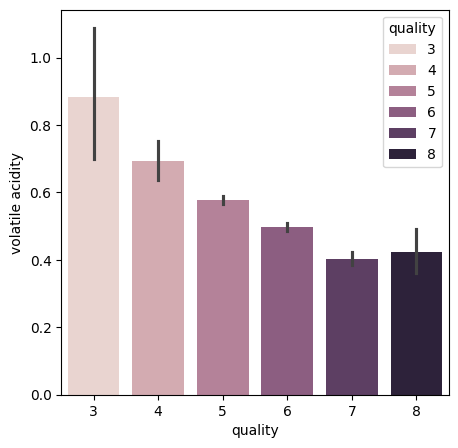

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize= (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine, hue = 'quality')

<Axes: xlabel='quality', ylabel='citric acid'>

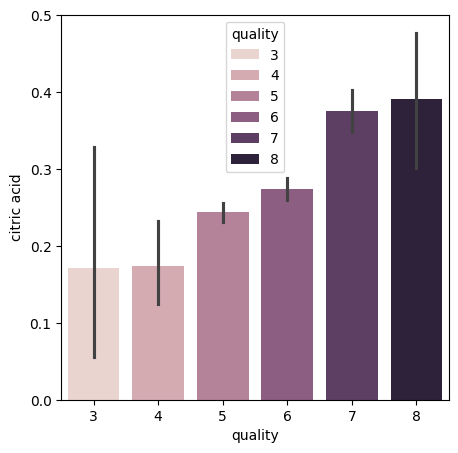

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize= (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine, hue = 'quality')

In [ ]:
# Correlation

In [ ]:
corr = wine.corr()

In [ ]:
# Two Kinds of correlations
# 1. Positive Correlation
# 2. Negative Correlation

<Axes: >

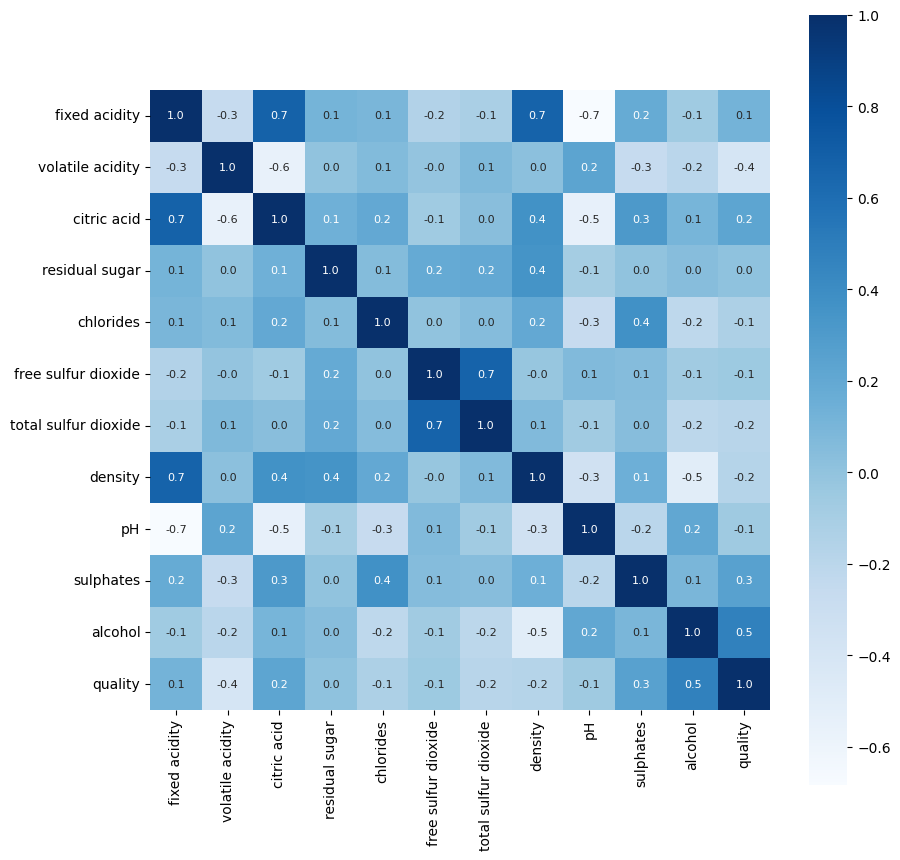

In [ ]:
# Contructing a heatmap to understand the correlation between the columns
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')
# cbar = color bar
# square is the shape
# fmt is how many decimals or floating point values
# annot is the numbers written down
# color is blue

In [ ]:
# Data Preprocessing

In [ ]:
# separate the data and Labels
X = wine.drop('quality', axis = 1)

In [ ]:
# Label Binarization
y = wine['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size = 0.2, stratify=y)

In [ ]:
# Model Training:

# RandomForestClassifier Model

model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Model Evaluation

pred = model.predict(X_test)

In [ ]:
accuracy_data = accuracy_score(pred, y_test)
print(accuracy_data)
print(classification_report(pred, y_test))
print(confusion_matrix(pred, y_test))

0.93125
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       285
           1       0.65      0.80      0.72        35

    accuracy                           0.93       320
   macro avg       0.81      0.87      0.84       320
weighted avg       0.94      0.93      0.93       320

[[270  15]
 [  7  28]]


In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# The model is performing quite well but there are some issues with it that need to be addressed,
# The results for predicting the good quality wines are not good, my model is very good at predicting bad quality wines
# compared to good quality wines.

In [ ]:
# Lets make some new columns to help the model understand my data properly:

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# New Columns

wine['fixed_acidity_to_volatile_acidity_ratio'] = wine['fixed acidity'] / wine['volatile acidity']
wine['citric_acid_to_fixed_acidity_ratio'] = wine['citric acid'] / wine['fixed acidity']
wine['total_free_sulfur_dioxide_ratio'] = wine['total sulfur dioxide'] / wine['free sulfur dioxide']
wine['chlorides total sulfur dioxide ratio'] = wine['chlorides'] / wine['total sulfur dioxide']
wine['alcohol_density_ratio'] = wine['alcohol'] / wine['density']

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   fixed acidity                            1599 non-null   float64
 1   volatile acidity                         1599 non-null   float64
 2   citric acid                              1599 non-null   float64
 3   residual sugar                           1599 non-null   float64
 4   chlorides                                1599 non-null   float64
 5   free sulfur dioxide                      1599 non-null   float64
 6   total sulfur dioxide                     1599 non-null   float64
 7   density                                  1599 non-null   float64
 8   pH                                       1599 non-null   float64
 9   sulphates                                1599 non-null   float64
 10  alcohol                                  1599 no

In [ ]:
wine['quality_label'] = (wine['quality'] >= 7).astype(int)

# Now, when defining features (X), drop both the original 'quality' and the new 'quality_label'
X = wine.drop(['quality', 'quality_label'], axis=1)

# And when defining the target (y), use only the new 'quality_label'
y = wine['quality_label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


scaler = StandardScaler()
# Fit scaler on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
rf_param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced'],
}

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
scoring_metric = 'f1'

In [ ]:
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=10,
    scoring=scoring_metric,
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)

In [ ]:
rf_grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, error_score='raise',
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [ ]:
rf_grid_search.best_params_

{'class_weight': None,
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
best_rf_model = rf_grid_search.best_estimator_

In [ ]:
y_pred_test_rf = best_rf_model.predict(X_test_scaled)
y_pred_proba_test_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       277
           1       0.70      0.70      0.70        43

    accuracy                           0.92       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.92      0.92      0.92       320



In [ ]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test_rf):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba_test_rf):.4f}")

cm_rf = confusion_matrix(y_test, y_pred_test_rf)
print("\nConfusion Matrix (Test Data - Random Forest):")
print(cm_rf)

Test Accuracy: 0.9187
Test ROC AUC: 0.9388

Confusion Matrix (Test Data - Random Forest):
[[264  13]
 [ 13  30]]
